# This script contains:
    1. Importing Visualization Libraries and Data
    2. Data Cleaning
    3. Exploring Relationships
        
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

1. Importing Visualization Libraries and Data

In [81]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [82]:
#Defining path
path = r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver'

In [83]:
#double checking path
path

'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver'

In [84]:
# Import data
van_listings = pd.read_csv(os.path.join(pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cleaned_van_listings.csv')

2. Data Cleaning

In [85]:
#checking import
van_listings.head()

,Unnamed: 0,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,13188,Riley Park,49.247730,-123.105090,Entire home/apt,150.0,2,283,1.68,1,0,30,23-156488
1,1,13221,Riley Park,49.254890,-123.097080,Entire home/apt,120.0,31,15,0.15,1,363,0,NaN
2,2,13358,Downtown,49.281174,-123.125931,Entire home/apt,165.0,1,493,3.00,1,0,55,22-311727
3,3,13490,Kensington-Cedar Cottage,49.256220,-123.066070,Entire home/apt,150.0,30,101,0.66,1,92,5,NaN
4,4,14267,Kensington-Cedar Cottage,49.249220,-123.081390,Entire home/apt,150.0,3,33,0.21,1,17,0,21-156500


In [86]:
# taking a look at dimensions
van_listings.shape

(6691, 14)

In [87]:
#Indexing columns to show names
van_listings.columns


Index(['Unnamed: 0', 'id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [88]:
#checking for mixed types
for col in van_listings.columns.tolist():
    weird = (van_listings[[col]].applymap(type) != van_listings[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (van_listings[weird]) > 0:
        print (col)

license


In [89]:
# changing data types
#changing names to strings that mixed
van_listings[['license']] = van_listings[['license']].astype('str')

In [90]:
#checking for missing values
van_listings.isnull().sum()

Unnamed: 0                           0
id                                   0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              840
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1139
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                              0
dtype: int64

In [91]:
#Finding duplicates
van_listings_dups = van_listings[van_listings.duplicated()]
van_listings_dups

,Unnamed: 0,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


no duplicates

3. Exploring Relationships

Creating correlation matrix using pandas

In [98]:
#creating subset to include chosen numeric variables
van_subset_corr = van_listings[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

In [99]:
#displaying new subset
van_subset_corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,150.0,2,283,1.68,1,0,30
1,120.0,31,15,0.15,1,363,0
2,165.0,1,493,3.00,1,0,55
3,150.0,30,101,0.66,1,92,5
4,150.0,3,33,0.21,1,17,0
...,...,...,...,...,...,...,...
6686,138.0,1,0,NaN,1,6,0
6687,NaN,1,0,NaN,1,269,0
6688,232.0,2,0,NaN,2,167,0
6689,75.0,30,0,NaN,2,248,0


In [100]:
#describing subset dimensions as we are now working with 7 numeric columns
van_subset_corr.shape

(6691, 7)

In [101]:
#Exporting 
van_subset_corr.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'van_subset_corr.csv')) 

In [103]:
# creating correlation matrix  
van_subset_corr.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.001994,-0.039338,-0.043224,-0.012038,0.068647,-0.044085
minimum_nights,0.001994,1.000000,-0.170764,-0.324344,0.072437,0.159536,-0.278652
number_of_reviews,-0.039338,-0.170764,1.000000,0.483418,-0.108751,-0.116816,0.671499
reviews_per_month,-0.043224,-0.324344,0.483418,1.000000,-0.091017,-0.137895,0.828574
calculated_host_listings_count,-0.012038,0.072437,-0.108751,-0.091017,1.000000,0.159767,-0.089801
availability_365,0.068647,0.159536,-0.116816,-0.137895,0.159767,1.000000,-0.141885
number_of_reviews_ltm,-0.044085,-0.278652,0.671499,0.828574,-0.089801,-0.141885,1.000000


In [104]:
#checking variables in corr
van_subset_corr.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

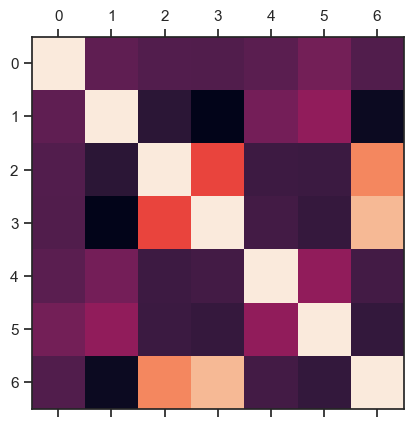

In [106]:
# Creating a correlation heatmap using matplotlib
plt.matshow(van_subset_corr.corr())
plt.show

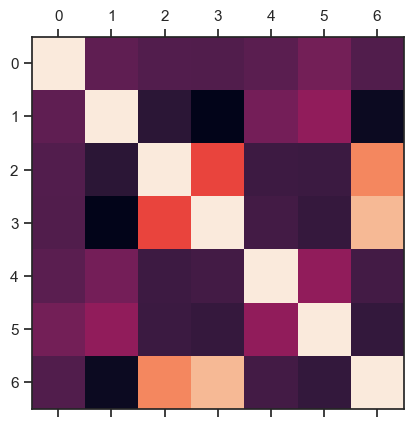

In [107]:
#Saving figure
plt.matshow(van_subset_corr.corr())
plt.savefig("out.png")

In [108]:
#current directory
cwd = os.getcwd()
cwd

'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver/Scripts'

Text(0.5, 1.0, 'Correlation Matrix for Airbnb Vancouver')

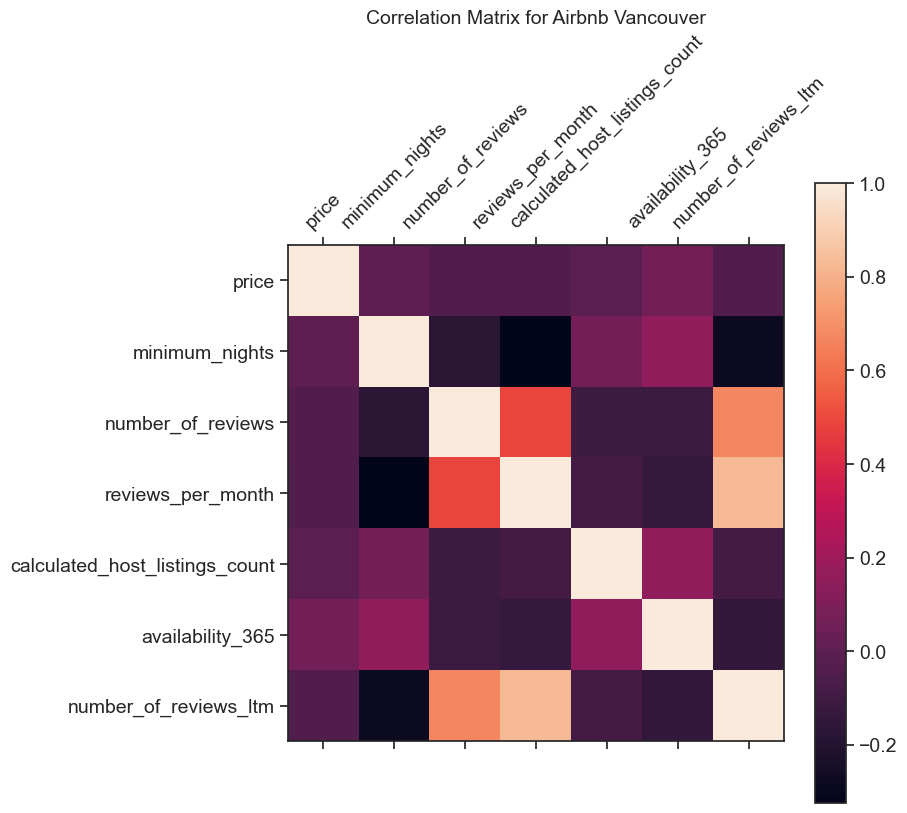

In [109]:
# Adding labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(van_subset_corr.corr(), fignum=f.number) # type of plot
plt.xticks(range(van_subset_corr.shape[1]), van_subset_corr.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(van_subset_corr.shape[1]), van_subset_corr.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix for Airbnb Vancouver', fontsize=14) # add title

Create a correlation map using seaborn

In [110]:
#Checking columns
van_subset_corr.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [112]:
#creating a subset to include all the variables
sub_corr_map = van_subset_corr[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

In [113]:
sub_corr_map

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,150.0,2,283,1.68,1,0,30
1,120.0,31,15,0.15,1,363,0
2,165.0,1,493,3.00,1,0,55
3,150.0,30,101,0.66,1,92,5
4,150.0,3,33,0.21,1,17,0
...,...,...,...,...,...,...,...
6686,138.0,1,0,NaN,1,6,0
6687,NaN,1,0,NaN,1,269,0
6688,232.0,2,0,NaN,2,167,0
6689,75.0,30,0,NaN,2,248,0


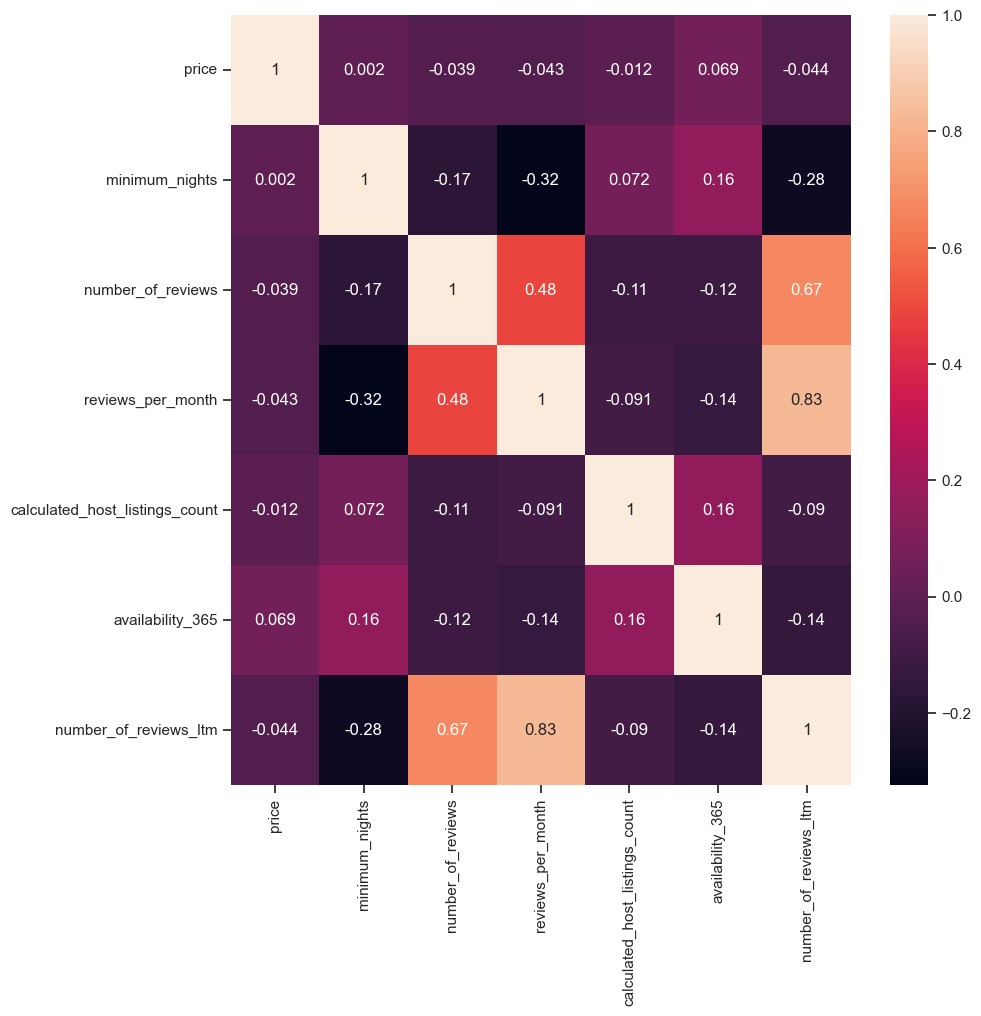

In [114]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_van = sns.heatmap(sub_corr_map.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [115]:
#Export viz
corr_van.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'van.heatmap.png'))

# Correlation analysis

 # 0: no relationship
# 0.1–0.3: weak relationship
# 0.3–0.5: moderate relationship
 # 0.5–1.0: strong relationship

Not much correlation between the displayed variables. Possible correlation between minimum_nights and availability_365 and number_of_reviews to further investigate. There are weak relationships throughout and therefore limited correlations and not necessarily a causation factor.

# Scatterplots
A linear relationship is one that follows the same trend throughout all of the data points.
The non-linear trend, the outlier value, and the large number of points that don’t fall close to the trend line all show you that the correlation coefficient alone isn’t enough to produce a holistic view of the relationship between these two variables.

/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


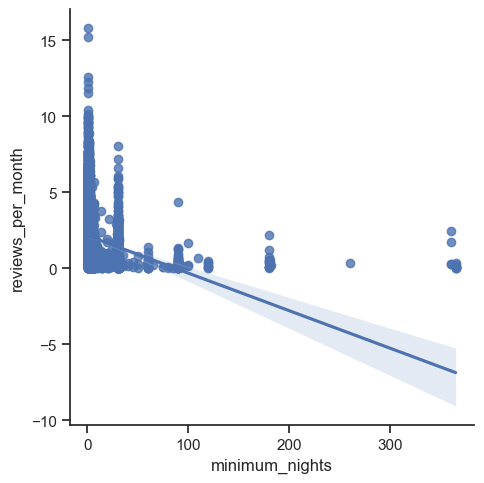

In [141]:
# Create scatterplot for the "minimum_nights" and "reviews_per_month" columns
sns.lmplot(x = 'minimum_nights', y = 'reviews_per_month', data = van_listings)

In [142]:
#Export viz
van_scatter.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'min_nights_reviews_per_month.png'))

Investigating the expected correlation. Many skewed outliers are observed. Also, there is a lot of variation throughout the data points.   Minimum nights should not exceed booking requirements and/or 365 available days, or as per airbnb rules, of the calendar year. It only observed and therefore suggestive that there are less reviews per month as minium nights required for booking increases. Further analysis could possibly indicate higher rental popularity based on reviews_per_month.

# Pair Plots
Combine a scatterplot with a histogram for all the variables you want to investigate further.
This amalgamation shows you the distribution of all numeric variables while also creating scatterplots for every variable crossed with every other variable

In [143]:
# checking index-variables in columns
van_subset_corr.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


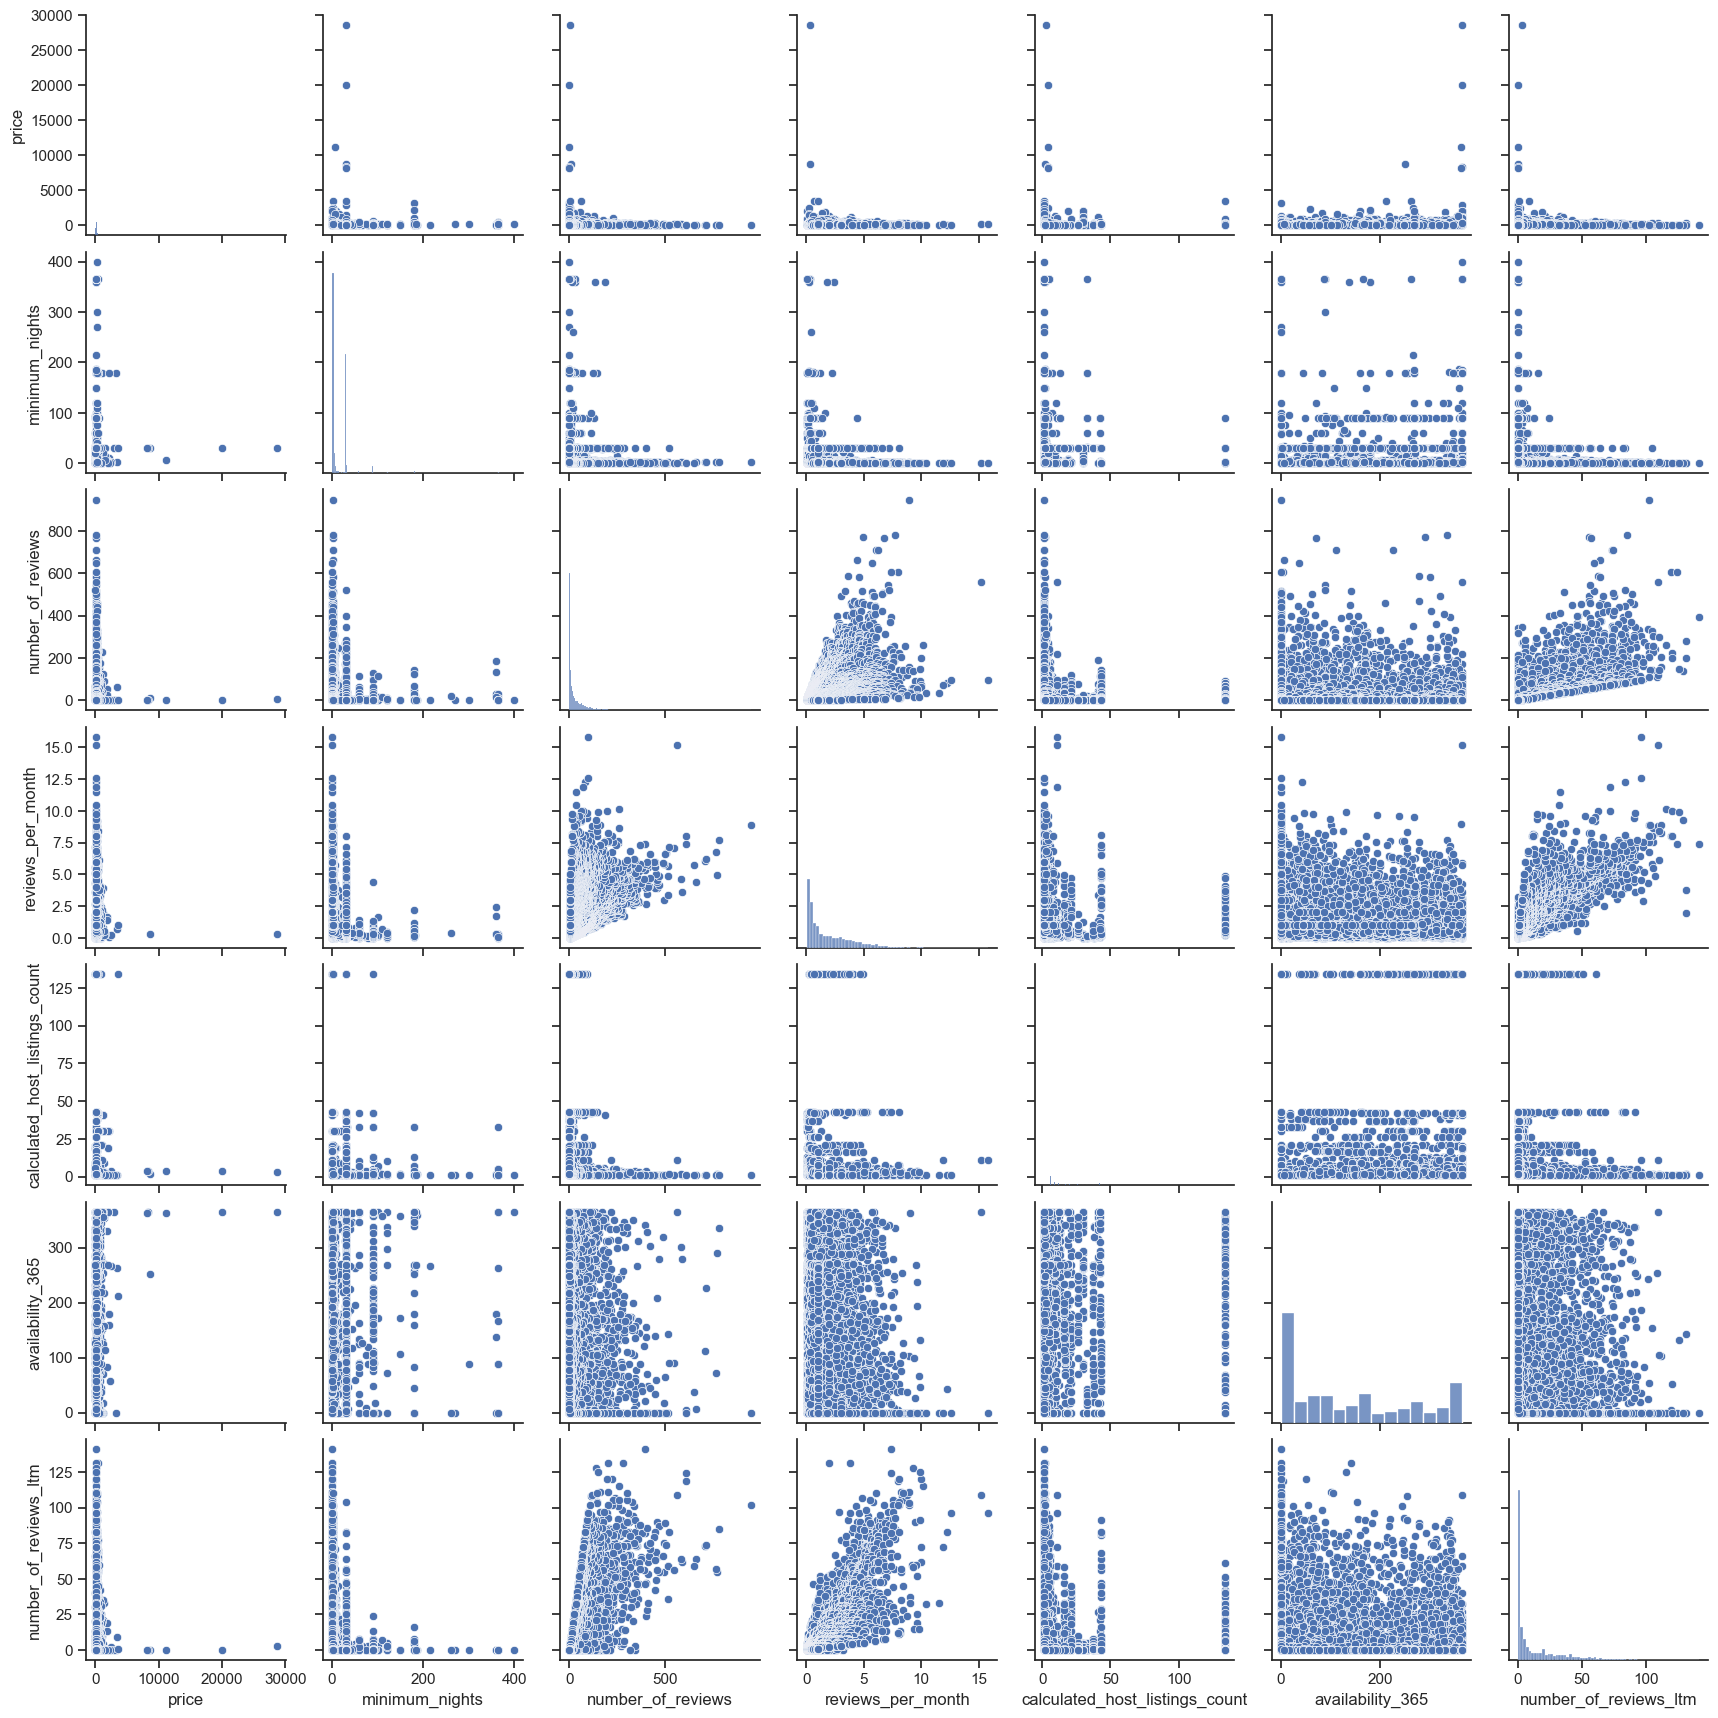

In [144]:
van_pair_plots = sns.pairplot(van_subset_corr)

Relationships between the variables are not very apparent due to the nature of the variables with weak correlations.Also, outliers still exist. It is worth further investigating variables among other columns including based upon neighborhood, host, and availability.

In [145]:
#Export to viz folder
van_pair_plots.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'van_7_pair_plots.png'))

# Categorial Plot

<Axes: xlabel='minimum_nights', ylabel='Count'>

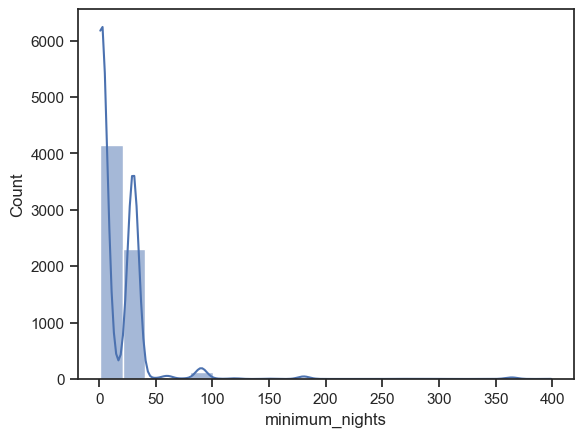

In [146]:
# #minium nights vs. number of reviews
sns.histplot(van_subset_corr['minimum_nights'], bins = 20, kde = True)

<Axes: xlabel='price', ylabel='Count'>

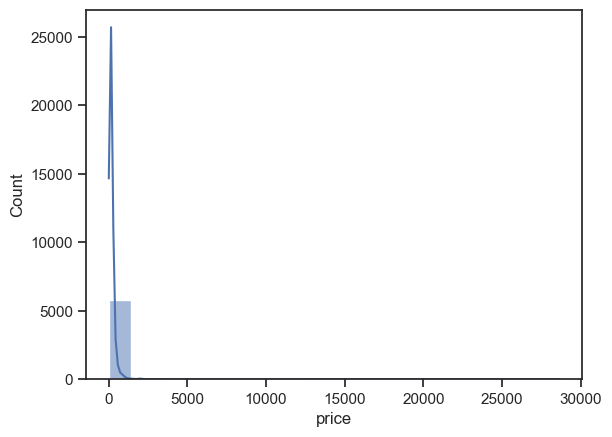

In [147]:
# #minium nights vs. price
sns.histplot(van_subset_corr['price'], bins = 20, kde = True)

<Axes: xlabel='availability_365', ylabel='Count'>

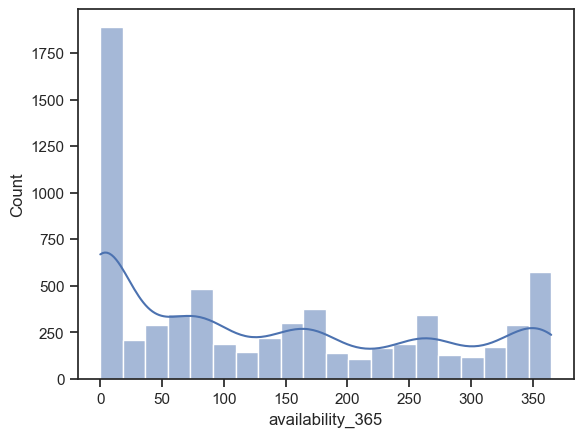

In [148]:
# availablility vs. price
sns.histplot(van_subset_corr['availability_365'], bins = 20, kde = True)

In [151]:
# Using a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the required booking. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution
van_listings.loc[van_listings['minimum_nights'] < 7, 'required_booking'] = '< one week'


In [152]:
van_listings.loc[(van_listings['minimum_nights'] >= 7) & (van_listings['minimum_nights'] < 21 ), 'required_booking'] = 'one to three weeks'


In [154]:
van_listings.loc[van_listings['minimum_nights'] >= 21, 'required_booking'] = '> 3 weeks'

In [155]:
van_listings['required_booking'].value_counts(dropna = False)

required_booking
< one week            3941
> 3 weeks             2536
one to three weeks     214
Name: count, dtype: int64

/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


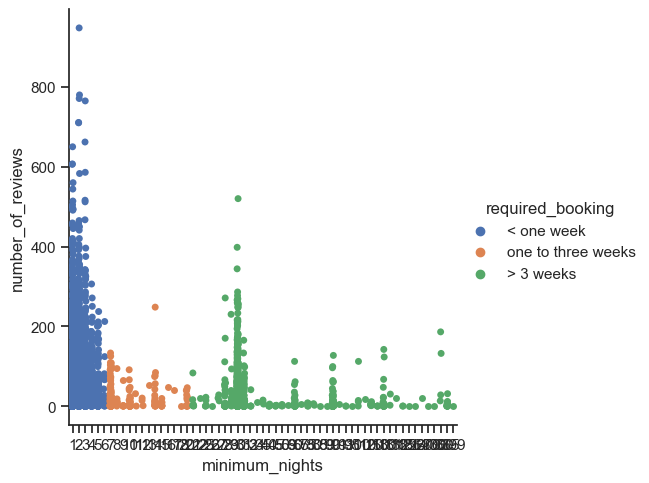

In [62]:
#Indexing columns
#Creating categorial plot in seaborn using the required booking categories created above
van_listings.columns
sns.set(style="ticks")
van_cat_plot = sns.catplot(x= 'minimum_nights', y = 'number_of_reviews', hue = 'required_booking', data = van_listings) 

# 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration

Upon further analysis what is happening here is a causation factor and not necessarily a relationship. It seems possibly that there are more reviews conducive to one night stays from different rentals being occupied and therefore more reviews for month. On the other hand for example, if 1 renter books for 3 weeks during that month, and leaves one review, obviously that equates with way less reviews per month. Based on popularity in booking after viewing the reviews I was thinking there may be a correlation to variables. However, this may only also be an indication of intherited bias to factor in in terms of examples such as whether or not people leave a review, may stay for the second or more time, and or  regardless on minimum nights stay.

In [156]:
#Exporting to viz folder
van_cat_plot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'van_cat_plot_min_nights_reviews.png'))

In [159]:
# Create labels for pricing to investigate further ranges
van_listings.loc[van_listings['price'] < 150, 'your_budget_per_nite'] = 'budget'
van_listings.loc[(van_listings['price'] >= 150) & (van_listings['price'] < 250), 'your_budget_per_nite'] = 'average'
van_listings.loc[(van_listings['price'] >= 250) & (van_listings['price'] < 450), 'your_budget_per_nite'] = 'mid average'
van_listings.loc[(van_listings['price'] >= 450) & (van_listings['price'] < 850), 'your_budget_per_nite'] = 'above average'
van_listings.loc[(van_listings['price'] >= 850) & (van_listings['price'] < 1250), 'your_budget_per_nite'] = 'high'
van_listings.loc[van_listings['price'] >= 1000, 'your_budget_per_nite'] = 'big budget'

In [160]:
van_listings['your_budget_per_nite'].value_counts(dropna = False)

your_budget_per_nite
budget           3224
average          1592
NaN               840
mid average       719
above average     232
big budget         46
high               38
Name: count, dtype: int64

In [161]:
#Creating a price comparison subset for further analyses
budget_subset = van_listings.loc[van_listings['price'] < 450]

In [162]:
#Checking value counts
budget_subset['your_budget_per_nite'].value_counts(dropna = False)

your_budget_per_nite
budget         3224
average        1592
mid average     719
Name: count, dtype: int64

In [164]:
#Checking basic stats
budget_subset['price'].describe()


count    5535.000000
mean      153.619693
std        80.130277
min        14.000000
25%        99.000000
50%       135.000000
75%       190.000000
max       449.000000
Name: price, dtype: float64

/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


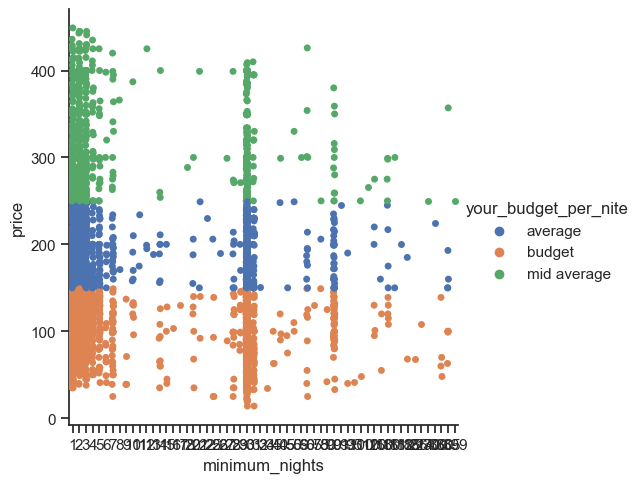

In [167]:
# Create Categorical Plot
sns.set(style = "ticks")
van_budget_cat_plot = sns.catplot(x = 'minimum_nights', y = 'price', hue = 'your_budget_per_nite', data = budget_subset)

In [169]:
#Exporting to viz folder
van_budget_cat_plot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cat_min_nights_price.png'))

<Axes: xlabel='price', ylabel='Count'>

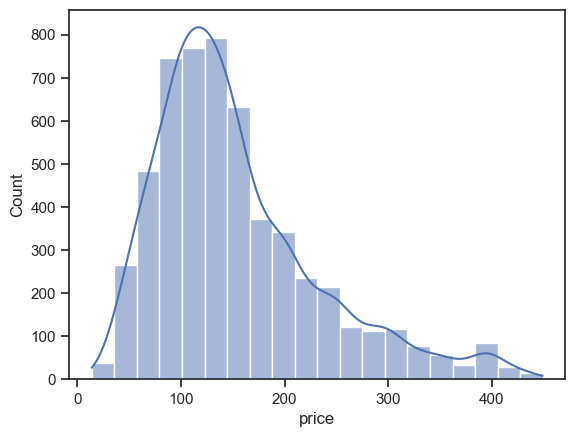

In [170]:
#creating price vs. minimum nights
sns.histplot(budget_subset['price'],bins = 20, kde = True)

/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


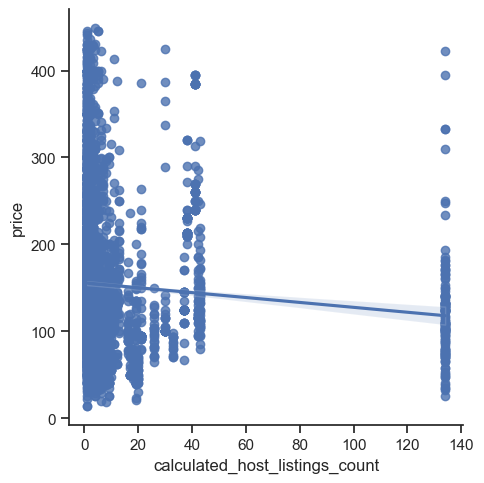

In [171]:
# Create Categorical Plot
scatter_host_price = sns.lmplot(x = 'calculated_host_listings_count', y = 'price', data = budget_subset)

In [172]:
budget_subset.room_type.value_counts()

room_type
Entire home/apt    4423
Private room       1090
Shared room          21
Hotel room            1
Name: count, dtype: int64

In [173]:
budget_subset.neighbourhood.value_counts()

neighbourhood
Downtown                    1462
West End                     437
Kitsilano                    384
Mount Pleasant               361
Downtown Eastside            326
Kensington-Cedar Cottage     320
Riley Park                   247
Hastings-Sunrise             226
Renfrew-Collingwood          220
Grandview-Woodland           205
Marpole                      168
Dunbar Southlands            162
Sunset                       155
Victoria-Fraserview          143
Fairview                     139
Oakridge                     112
West Point Grey               91
Arbutus Ridge                 90
Killarney                     72
Shaughnessy                   67
Kerrisdale                    62
South Cambie                  58
Strathcona                    28
Name: count, dtype: int64

# Hypothesis

Answers to the key questions related to price, neighbourhood, host and revealed that the expected correlation between number of reviews and reviews per month, where no other variable show a strong correlation. However, no other variables are correlated and linear relationships do not exist. Other factors possibly contributing to increased price or revenue per neighbourhood to be explored include room_type of entire home/apt as 66% overall of rentals and top 3 rental neighbourhoods of Downtown, West End and Kitsilano. These data are suggestive of alternative hypothesis where introduced or sample bias is reduced to the extent possible.

AS a result, I'm interested in whether or not rentals can price increase (resulting in increased revenue) by testing the hypothesis related to determining factors of price, neighbourhoods and host categories.

Null H: Top neighborhoods budget rental prices are the SAME (prices) as the ones in BOTTOM neighbourhoods budget rental prices.
Alt H: Top neighborhoods budget rental prices DO NOT HAVE the SAME (prices) as the ones in BOTTOM neighbourhoods budget rental prices.

Null H: The price of listings from those who are NOT superhosts CHARGE the SAME as the price of listings from those who ARE superhosts.
Alt H: THe price of listings from those who are NOT superhosts DO NOT CHARGE the SAME as the price of listings from those who ARE superhosts.